In [44]:
import sys 
sys.path.append("../src/")

from ApplicationModel import *
import json
import os

def load_from_file(directory,filename):
    filename = f"{directory}\{filename}.json"
    with open(filename, 'r', encoding='utf-8') as fo:
        serialized_data = json.loads(json.load(fo))
            
    return  serialized_data

directory="C:/Users\smora\Documents\LiU\Workspace\\NetGAP\data"
filename="extended_usecase"
#filename="saab_usecase_2"
extended_uc=load_from_file(directory,filename)
1/2e4
process_list={k:Process( p["pID"], p["app"], p["nOPS"]*1/2e3, p["freq"]) for k,p in extended_uc["process_list"].items()}
process_list["45"].printProcess()

message_list={k:Message(  m["mID"], m["source"], m["dest"],m["freq"],m["size"]) for k,m in extended_uc["message_list"].items()}
message_list["455"].printMessage()

45(22)	: 2.76E+05OPS, 0Hz, i:0.00E+00bps o:0.00E+00bps
455	: 155->234:36703b 8Hz


In [45]:
class DoubleCrossoverOperator1:

    def __init__(self,seed=None):
        self.rng=np.random.default_rng(seed)
    
    def cross(self,p1,p2):

        cutoff = self.rng.integers(low=1,high=p1.genome[0].size)

        def one_offspring(p1,p2):

            offspring=Individual(size=(len(p1.genome[0]),len(p1.genome[1])))

            offspring.genome[0][:cutoff] = p1.genome[0][:cutoff]
            offspring.genome[0][cutoff:] = p2.genome[0][cutoff:]

            p1_included=np.where(p1.genome[0][:cutoff]==1)[0]
            p2_included=np.where(p2.genome[0][cutoff:]==1)[0]+cutoff


            p1_valid=np.where(np.isin(p1.genome[1],p1_included))
            offspring.genome[1][p1_valid]=p1.genome[1][p1_valid]

            p2_valid=np.where(np.isin(p2.genome[1],p2_included))
            offspring.genome[1][p2_valid]=p2.genome[1][p2_valid]

            allocated=np.where(offspring.genome[0]==1)[0]
            invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]

            if len(invalid_indexes)>0:
                offspring.genome[1][invalid_indexes]=self.rng.choice(allocated,size=len(invalid_indexes))  

            invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]

            if len(invalid_indexes)>0:
                print(invalid_indexes)

            return offspring
    
        o1 = one_offspring(p1, p2)
        o2 = one_offspring(p2, p1)
        return(o1,o2)
    
    
class DoubleCrossoverOperator2:

    def __init__(self,seed=None):
        self.rng=np.random.default_rng(seed)
    
    def cross(self,p1,p2):
        o1,o2=Individual(size=(len(p1.genome[0]),len(p1.genome[1]))),Individual(size=(len(p1.genome[0]),len(p1.genome[1])))
        
        
        def single_cross(genome_p1,genome_p2):
            cutoff = self.rng.integers(low=1,high=genome_p1.size)
            
            def one_offspring(cutoff,genome_p1,genome_p2):
                
                offspring_genome=np.zeros(genome_p1.size)
                
                offspring_genome[:cutoff] = genome_p1[:cutoff]
                offspring_genome[cutoff:] = genome_p2[cutoff:]

                return offspring_genome

            offspring_1 = one_offspring(cutoff,genome_p1, genome_p2)
            offspring_2 = one_offspring(cutoff,genome_p2, genome_p1)
            
            return offspring_1, offspring_2
    
        def make_valid(offspring,p1,p2):
            
            allocated=np.where(offspring.genome[0]==1)[0]
            invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]
            
            if len(invalid_indexes)>0:   
                
                for i,parent in enumerate([p1.genome,p2.genome]):
                    
                    allocated_parent=np.where((parent[0]==1))[0]
                    allocated_offspring=np.where((offspring.genome[0]==1))[0]
                    mutual_allocated=np.where( np.isin(allocated_parent,allocated_offspring)==True )[0]
                    valid_parent_idxs=invalid_indexes[np.where(np.isin(parent[1][invalid_indexes],mutual_allocated)==True)[0]]
                    offspring.genome[1][valid_parent_idxs]=parent[1][valid_parent_idxs]
                    
                    invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]
            
            invalid_final=np.where(np.isin(offspring.genome[1],allocated)==False)[0]
            
            return offspring
        
        o1.genome[0],o2.genome[0] = single_cross(p1.genome[0], p2.genome[0])   
        o1.genome[1],o2.genome[1] = single_cross(p1.genome[1], p2.genome[1])
        
        if not all(o1.genome[0]==0):
            o1 = make_valid(o1,p1,p2)
            
        else: 
            o1=p1
        
        if not all(o2.genome[0]==0):
            o2 = make_valid(o2,p1,p2)
            
        else: 
            o2=p2
        
        return p1,p2
    

class DoubleCrossoverOperator3:

    def __init__(self,seed=None):
        self.rng=np.random.default_rng(seed)
    
    def cross(self,p1,p2):
        o1,o2=Individual(size=(len(p1.genome[0]),len(p1.genome[1]))),Individual(size=(len(p1.genome[0]),len(p1.genome[1])))
        
        
        def single_cross(genome_p1,genome_p2):
            cutoff = self.rng.integers(low=1,high=genome_p1.size)
            
            def one_offspring(cutoff,genome_p1,genome_p2):
                
                offspring_genome=np.zeros(genome_p1.size)
                
                offspring_genome[:cutoff] = genome_p1[:cutoff]
                offspring_genome[cutoff:] = genome_p2[cutoff:]

                return offspring_genome

            offspring_1 = one_offspring(cutoff,genome_p1, genome_p2)
            offspring_2 = one_offspring(cutoff,genome_p2, genome_p1)
            
            return offspring_1, offspring_2
    
        def make_valid(offspring):
            allocated=np.where(offspring.genome[0]==1)[0]
            invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]
            if len(invalid_indexes)>0:
                offspring.genome[1][invalid_indexes]=self.rng.choice(allocated,size=len(invalid_indexes))
            return offspring
        
        o1.genome[0],o2.genome[0] = single_cross(p1.genome[0], p2.genome[0])   
        o1.genome[1],o2.genome[1] = single_cross(p1.genome[1], p2.genome[1])
        
        if not all(o1.genome[0]==0):
            o1 = make_valid(o1)
            
        else: 
            o1=p1
        
        if not all(o2.genome[0]==0):
            o2 = make_valid(o2)
            
        else: 
            o2=p2
        
        return p1,p2

In [53]:
class Individual:
    def __init__(self,size,init_function=None):
            
            if isinstance(size,int):
                self.genome=np.zeros(size,dtype=int)
            elif isinstance(size,tuple): 
                self.genome = [np.zeros(s) for s in size]
            else:
                Exception("Expected int or tuple, got something else instead")
            
            if callable(init_function):
                self.genome=init_function(self.genome)
    
    def __str__(self):
        return str(self.genome)

class DummyMut():
    
    def mutate(self,individual):
        return individual

class DoubleMut():
    def __init__(self,seed ,rate,process_list=None,):
        self.rng=np.random.default_rng(seed)
        #self.process_nOPS=[p.nOPS for p in process_list.values()]
        self.rate=rate
    def mutate(self,individual):
        
        def make_valid(offspring):
            allocated=np.where(offspring.genome[0]==1)[0]
            invalid_indexes=np.where(np.isin(offspring.genome[1],allocated)==False)[0]
            if len(invalid_indexes)>0:
                
                #p=1-np.asarray([(np.sum((offspring.genome[1]==x)*self.process_nOPS/16e5)) for x in allocated])
                #print(p)
                #p=p/np.sum(p)
                #print(p)
                offspring.genome[1][invalid_indexes]=self.rng.choice(allocated,size=len(invalid_indexes))
                
            return offspring
        
        if self.rng.random()<self.rate/2:
            mutation_count=self.rng.integers(low=1,high=3)#len(individual.genome[0])/4)
            mutation_indexes=self.rng.integers(low=0,high=len(individual.genome[0]),size=mutation_count)
            individual.genome[0][mutation_indexes]=self.rng.integers(low=0,high=2,size=len(mutation_indexes))
            
            while all(individual.genome[0]==0):
                individual.genome[0][mutation_indexes]=self.rng.integers(low=0,high=2,size=len(mutation_indexes))
                
            make_valid(individual)
        
                
        if self.rng.random()<self.rate:
            mutation_indexes=self.rng.integers(low=0,high=len(individual.genome[1]),size=2)
            individual.genome[1][mutation_indexes]=np.flip(individual.genome[1][mutation_indexes])
        
        return individual
        
        #stops before here
        if self.rng.random()<self.rate:
            mutation_count=self.rng.integers(low=1,high=3)#len(individual.genome[1])/4)
            mutation_indexes=self.rng.integers(low=0,high=len(individual.genome[1]),size=mutation_count)
            individual.genome[1][mutation_indexes]=self.rng.choice(np.where(individual.genome[0]==1),size=len(mutation_indexes),axis=1)
            
        
        return individual


class AllocationGenomeInitializer:
        def __init__(self, seed=None):
             self.rng=np.random.default_rng(seed)
                    
        def __call__(self,genome):
            inclusion=self.rng.integers(low=0,high=2,size=len(genome[0]))
            allocation=self.rng.choice(np.where(inclusion==1),size=len(genome[1]),axis=1)[0]
            
            included=np.where(inclusion[0]==1)[0]
            invalid_indexes=np.where(np.isin(allocation[1],included)==False)[0]
            
            return[inclusion,allocation]
        
class AllocationEvaluator():
    def __init__(self,process_list,message_list):
        
        self.process_nOPS=[p.nOPS for p in process_list.values()]
        
        self.message_src=[m.source for m in message_list.values() ]
        self.message_dst=[m.dest for m in message_list.values() ]
        self.message_bw=np.asarray([m.size*m.freq for m in message_list.values() ])
        #print(self.process_out)
        
        
    def calculate_score(self,genome):
        link_th = 0.8
        link_capacity = 100e6
        cpm_capacity = 27e5
        cpm_th = 0.8
        cost_cpm = 10
        
        msg_src_allocation=genome[1][self.message_src]
        msg_dst_allocation=genome[1][self.message_dst]
        
        internal_msg=np.where(np.equal(msg_src_allocation,msg_dst_allocation)==True)
        external_msg=np.where(np.equal(msg_src_allocation,msg_dst_allocation)==False)
        
        external_msg_src=msg_src_allocation[external_msg]
        external_msg_dst=msg_dst_allocation[external_msg]
        external_msg_bw=self.message_bw[external_msg]
        
        module_in_bw=np.asarray([np.sum(external_msg_bw[np.where(external_msg_dst==x)]) for x in range(len(genome[0]))])
        module_out_bw=np.asarray([np.sum(external_msg_bw[np.where(external_msg_src==x)]) for x in range(len(genome[0]))])
        
   
        max_bandwith=max(np.max(module_in_bw),np.max(module_out_bw))
        bandwidth_violations=np.sum(module_in_bw>=link_capacity*link_th)+np.sum(module_out_bw>=link_capacity*link_th)        
        
        cost=np.sum(cost_cpm*genome[0])
        
        module_utilization=np.zeros(len(genome[0]))
        link_utilization=np.zeros((len(genome[0]),2))
        
        allocated=np.where(genome[0]==1)[0]
        allocation_violations=np.sum(np.isin(genome[1],allocated)==False)
      
        if(allocation_violations>0):
            print(allocation_violations)

        module_utilization=np.asarray([(np.sum((genome[1]==x)*self.process_nOPS))   for x in range(len(genome[0]))])
        capacity_violations=np.sum(module_utilization>=cpm_capacity*cpm_th)
        
        score=1/(np.sum(genome[0])/8*0 + np.max(module_utilization/(cpm_capacity*cpm_th))**8 + (max_bandwith/(link_capacity*link_th))**8)
        #score=1/(np.max(module_utilization/(cpm_capacity*cpm_th))**4 + (max_bandwith/(link_capacity*link_th))**4)
        
        stats={}
        stats["score"]=score
        stats["bandwidth_out"]=module_out_bw/link_capacity
        stats["bandwidth_in"]=module_in_bw/link_capacity
        stats["bandwidth_violations"]=bandwidth_violations
        stats["capacity_violations"]=capacity_violations
        stats["allocation_violations"]=allocation_violations
        stats["num_modules"]=np.sum(genome[0])
        stats["max_bandwidth"]=(np.max(module_in_bw)/link_capacity,np.max(module_out_bw)/link_capacity)
        stats["max_utilization"]=np.max(module_utilization)/cpm_capacity
        stats["module_utilization"]=module_utilization/cpm_capacity
                
        return score, stats
        
    def evaluate(self, individual : Individual):
        if isinstance(individual,Individual):
            score,_ =self.calculate_score(individual.genome)
            return score
        else:
                raise TypeError("Evaluate argument has to be a genetic algorithm individual")

In [54]:
import numpy as np
print(len(process_list.values()))
print(np.sum([p.nOPS for p in process_list.values()])/27e5/0.8)

263
50.861535442917976


Seach took: 634.0042915344238 s
2.6496406191832096e-07 31 26 17 0
(3.43637945, 3.70419077) 5.273080556118977


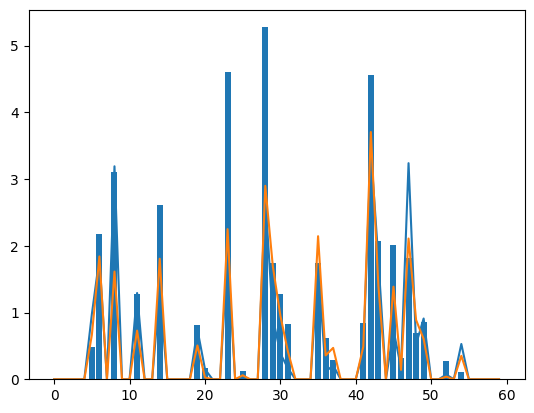

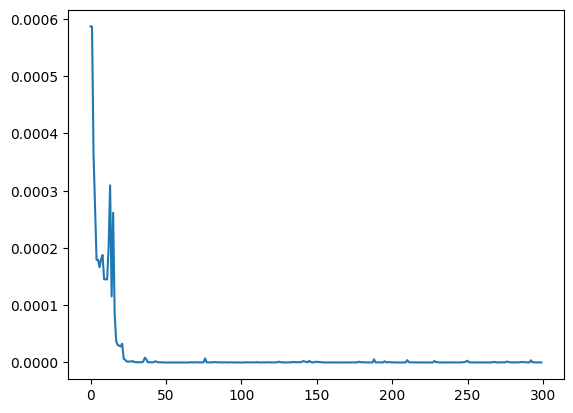

In [55]:

from GeneticAlgorithm import Individual, GeneticAlgorithm,ExponentialRankSelector
import time

seed=3475845
#seed=3475878645
pop_size=500
generations=300
rate=0.15
rng=np.random.default_rng(seed)
n_mod=60

seed_init=rng.integers(low=1,high=np.iinfo(np.int32).max)
seed_sel=rng.integers(low=1,high=np.iinfo(np.int32).max)
seed_mut=rng.integers(low=1,high=np.iinfo(np.int32).max)
seed_cross=rng.integers(low=1,high=np.iinfo(np.int32).max)

evaluator=AllocationEvaluator(process_list,message_list)
init_fn=AllocationGenomeInitializer(seed=seed_init)
selector=ExponentialRankSelector(seed=seed_sel)
crossop=DoubleCrossoverOperator3(seed=seed_cross)
mutop=DoubleMut(seed_mut,rate=rate)#,process_list)
#mutop=DummyMut()

ga = GeneticAlgorithm(genome_size = (n_mod,len(process_list)), crossover_operator=crossop, 
                              mutation_operator=mutop, evaluator=evaluator, selector=selector)

start=time.time()
individuals, fitness, fit_hist= ga.run(pop_size = pop_size, generations=generations, init_fn=init_fn, get_hist=True)
end=time.time()
print("Seach took:",end-start,"s")


i,g=evaluator.calculate_score(individuals[0].genome)
print(i,g["num_modules"],g["bandwidth_violations"],g["capacity_violations"],g["allocation_violations"])
print(g["max_bandwidth"],g["max_utilization"])
plt.bar([i for i in range(len(g["module_utilization"]))],g["module_utilization"])
plt.plot(g["bandwidth_in"])
plt.plot(g["bandwidth_out"])
plt.show()
plt.plot(fit_hist)